Simulation cell parameters

In [1]:
Nx = 64; Ny = 64;
NxNy = Nx * Ny
dx = 1.0; dy = 1.0;

Time integration parameters:

In [41]:
nstep = 20000
nprint = 100
dtime = 1.e-2
ttime = 0.0;

Material specific parameters:

In [3]:
c0 = 0.4;
mobility = 1.0;
grad_coef = 0.5;

prepare microstructure:

In [19]:
function micro_ch_pre(Nx,Ny,c0,iflag)
    noise = 0.02
    
    if (iflag == 1)
        con = zeros(Nx,Ny)
        for i = 1:Nx
            for j = 1:Ny
                con[i,j] = c0 + noise*(0.5-rand())
            end
        end
    else
        con = zeros(NxNy)
        for i = 1:Nx
            for j = 1:Ny
                ii = (i-1) * Nx + j
                con[ii] = c0 + noise*(0.5-rand())
            end
        end
    end
    return con
end

micro_ch_pre (generic function with 1 method)

Calculate the total energy of the system.

In [8]:
function calculate_energy(Nx,Ny,con,grad_coef)
    energ = 0.0
    for i = 1:Nx-1
        ip = i+1
        for j = 1:Ny-1
            jp = j+1
            energ = energ + con[i,j]^2 * (1 - con[i,j])^2 +
            0.5 * grad_coeff * ((con[ip,j]-con[i,j])^2 +
            (con[i,jp]-con[i,j])^2)
        end
    end
    return energ
end

calculate_energy (generic function with 1 method)

In [26]:
function free_energy_ch(i,j,con)
    A = 1.0
    dfdcon = A*(2.0*con[i,j]*(1-con[i,j])^2
    -2.0*con[i,j]^2*(1.0-con[i,j]))
end

free_energy_ch (generic function with 1 method)

In [30]:
iflag = 1
lap_con = zeros(Nx,Ny)
dummy = zeros(Nx,Ny)
lap_dummy = zeros(Nx,Ny)
con = micro_ch_pre(Nx,Ny,c0,iflag);

In [ ]:
using Printf
for istep = 1:nstep
    ttime = ttime + dtime
    for i = 1:Nx
        for j = 1:Ny
            jp = j+1
            ip = i+1
            
            jm = j-1
            im = i-1
            
            if (im == 0)
                im = Nx
            end
            if (ip == (Nx+1))
                ip = 1
            end
            
            if (jm == 0)
                jm = Ny
            end
            if (jp == (Ny+1))
                jp = 1
            end
            
            hne = con[ip,j]
            hnw = con[im,j]
            hns = con[i,jm]
            hnn = con[i,jp]
            hnc = con[i,j]
            
            lap_con[i,j] = (hnw+hne+hns+hnn - 4.0 * hnc)/(dx*dy)
            
            # derivative of free energy
            dfdcon = free_energy_ch(i,j,con)
            
            dummy[i,j] = dfdcon - grad_coef * lap_con[i,j]
        end
    end
    
    for i = 1:Nx
        for j = 1:Ny
            jp = j+1
            jm = j-1
            ip = i+1
            im = i-1
            
            if (im == 0)
                im = Nx
            end
            if (ip == (Nx+1))
                ip = 1
            end
            
            if (jm == 0)
                jm = Ny
            end
            if (jp == (Ny+1))
                jp = 1
            end
            
            hne = dummy[ip,j]
            hnw = dummy[im,j]
            hns = dummy[i,jm]
            hnn = dummy[i,jp]
            hnc = dummy[i,j]
            
            lap_dummy[i,j] = (hnw+hne+hns+hnn - 4.0 * hnc)/(dx*dy)
            
            # time integration
            con[i,j] = con[i,j]+dtime*
            mobility * lap_dummy[i,j]
            
            # for small deviations
            if (con[i,j] >= 0.9999)
                con[i,j] = 0.9999
            end
            
            if (con[i,j] <= 0.00001)
                con[i,j] = 0.00001
            end
        end
    end
    
    # print results
    if (mod(istep,nprint) == 0 || 
        (istep==1))
        @printf("done step %5d\n",istep)
    end
end

done step     1
done step   100
done step   200
done step   300
done step   400
done step   500
done step   600
done step   700
done step   800
done step   900
done step  1000
done step  1100
done step  1200
done step  1300
done step  1400
done step  1500
done step  1600
done step  1700
done step  1800
done step  1900
done step  2000
done step  2100
done step  2200
done step  2300
done step  2400
done step  2500
done step  2600
done step  2700
done step  2800
done step  2900
done step  3000
done step  3100
done step  3200
done step  3300
done step  3400
done step  3500
done step  3600
done step  3700
done step  3800
done step  3900
done step  4000
done step  4100
done step  4200
done step  4300
done step  4400
done step  4500
done step  4600
done step  4700
done step  4800
done step  4900
done step  5000
done step  5100
done step  5200
done step  5300
done step  5400
done step  5500
done step  5600
done step  5700
done step  5800
done step  5900
done step  6000
done step  6100
done ste

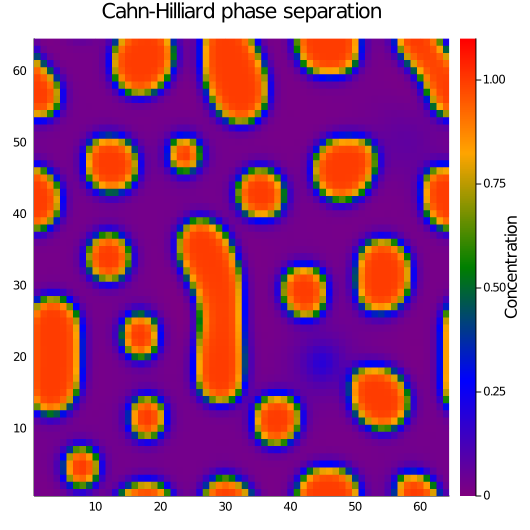

In [40]:
using Plots
x = [1:64]*dx
y = [1:64]*dy
heatmap(x[:], y[:], con, clims=(0, 1.1), title="Cahn-Hilliard phase separation",
color=:rainbow, colorbar_title="Concentration", linewidth=0.,
size=(530,530))

In [43]:
using Printf
@printf("this is only the test %s","Toni")

this is only the test Toni